## Logistic Regression

<img src="./images/anime.png" width="500"/> <img src="./images/teach.jpg" width="500"/>

Вычислительный граф для модели логистической регрессии:

![caption](./images/graph.png)

Алгоритм SGD:

0) инициализируем веса  
1) сэмплируем batch_size примеров из выборки  
2) forward pass: вычисляем значения в узлах вычислительного графа  
3) backward pass: считаем градиенты $\frac{dL}{dw}$ Loss-функции по отношению к параметрам модели  
4) обновляем параметры:  
$$ w := w - lr*\frac{dL}{dw} $$  
5) Если не выполнен критерий завершения (превышено число итераций / параметры перестали существенно изменяться и т.п.), вернуться на шаг 1  

Реализуйте вычисление сигмоиды и постройте ее график в одномерном случае

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

from tests.tests import *

In [2]:
def sigmoid(x):
    # your code here

In [3]:
x = np.linspace(-10, 10, 100)
test_sigmoid(sigmoid, x)

In [4]:
plt.figure(figsize=(8, 6))

# your code here

plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


'\nplt.figure(figsize=(8, 6))\n\nplt.plot(x, sigmoid(x))\n\nplt.title("Sigmoid")\nplt.xlabel("x")\nplt.ylabel("y")\nplt.show()\n'

Реализуйте методы _predict, _init_weights, _forward_pass, _backward_pass, BCE в классе LogisticRegression.

In [5]:
class LogisticRegression:
    def __init__(self, X_train, y_train):
        self.w = None
        self.b = None
        
        self.N = X_train.shape[0]
        self.D = X_train.shape[1]
        self.O = y_train.shape[1]
        if  self.w is None or \
            self.b is None or \
            self.w.shape != (self.D, self.O) or \
            self.b.shape != (1., self.O):
            
            self._init_weights()
        
        
    @staticmethod
    def sigmoid(x):
        return sigmoid(x)
    
    @staticmethod
    def transform_one_hot(y):
        n_classes = max(y)+1 # classes start from 0
        one_hot = np.zeros(shape=(y.shape[0], n_classes))
        one_hot[tuple((np.arange(y.shape[0]), y))] = 1
        y = one_hot
        return y
    
    @staticmethod
    def loss(*args, **kwargs):
        return LogisticRegression.BCE(*args, **kwargs)
        
    @staticmethod
    def BCE(x, y):
        # Binary Cross Entropy
        pred = x
        pred = np.maximum(pred, 1e-5)
        pred = np.minimum(pred, 1.-1e-5)
        # your code here
        
    @staticmethod
    def sample_batch(X_train, y_train, batch_size):
        if batch_size is None:
            rand_idx = np.random.permutation(X_train.shape[0])[:batch_size]
            X, y = X_train[rand_idx, ...], y_train[rand_idx, ...]
        else:
            X, y = X_train, y_train
        return X, y
    
    def fit(self, 
            X_train, y_train, 
            iters=10000, 
            lr_base=0.01, 
            steps=4, 
            batch_size=None, 
            print_freq=20):
        
        """
        fit model to data
        
        params:
            X_train, y_train - training data. Shapes are:
                X_train: (N_samples, N_features),
                y_train: (N_samples, N_classes),
            iters - number of iterations to train
            lr_base - base learning rate
            steps - number of steps to drop the LR
            batch_size - batch size (== X.shape[0] if None)
            weight decay - lambda coefficient for L2 regularization
            print_freq - frequency of logging
        """
            
        for i in range(iters):
            
            # sample data
            X, y = self.sample_batch(X_train, y_train, batch_size)

            z, o, loss = self._forward_pass(X, y)
            
            dz, dw, db = self._backward_pass(o, X, y)
        
            # update params
            lr = lr_base * 0.1 ** (i // (iters // steps))
            self._update_params(lr, dw, db)
            
            # log
            if i % print_freq == 0:
                print(f"iter: {i}, loss: {loss:5.3}, lr: {lr:5.3}")

        return self
    
    def predict(self, X):
        # your code here
        
    def _forward_pass(self, X, y):
        # your code here
        
    def _backward_pass(self, o, X, y):
        # your code here
        
    def _update_params(self, lr, dw, db):
        # your code here
        
    def _init_weights(self):
        # your code here

Протестируйте обучение модели на простом примере

In [6]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0], [1], [1], [1]])

model = LogisticRegression(X, y)

In [7]:
np.random.seed(1)
test_predict(model, X)
test_loss(model, X, y)
z, o, loss = test_forward_pass(model, X, y)
test_backward_pass(model, o, X, y)

In [8]:
model.fit(X, y)

iter: 0, loss: 0.688, lr:  0.01
iter: 20, loss: 0.654, lr:  0.01
iter: 40, loss: 0.624, lr:  0.01
iter: 60, loss: 0.599, lr:  0.01
iter: 80, loss: 0.577, lr:  0.01
iter: 100, loss: 0.557, lr:  0.01
iter: 120, loss: 0.541, lr:  0.01
iter: 140, loss: 0.526, lr:  0.01
iter: 160, loss: 0.512, lr:  0.01
iter: 180, loss: 0.501, lr:  0.01
iter: 200, loss:  0.49, lr:  0.01
iter: 220, loss: 0.481, lr:  0.01
iter: 240, loss: 0.472, lr:  0.01
iter: 260, loss: 0.464, lr:  0.01
iter: 280, loss: 0.457, lr:  0.01
iter: 300, loss: 0.451, lr:  0.01
iter: 320, loss: 0.445, lr:  0.01
iter: 340, loss: 0.439, lr:  0.01
iter: 360, loss: 0.434, lr:  0.01
iter: 380, loss: 0.429, lr:  0.01
iter: 400, loss: 0.424, lr:  0.01
iter: 420, loss:  0.42, lr:  0.01
iter: 440, loss: 0.416, lr:  0.01
iter: 460, loss: 0.412, lr:  0.01
iter: 480, loss: 0.408, lr:  0.01
iter: 500, loss: 0.405, lr:  0.01
iter: 520, loss: 0.401, lr:  0.01
iter: 540, loss: 0.398, lr:  0.01
iter: 560, loss: 0.395, lr:  0.01
iter: 580, loss: 0.3

iter: 6200, loss: 0.228, lr: 0.0001
iter: 6220, loss: 0.228, lr: 0.0001
iter: 6240, loss: 0.228, lr: 0.0001
iter: 6260, loss: 0.228, lr: 0.0001
iter: 6280, loss: 0.228, lr: 0.0001
iter: 6300, loss: 0.228, lr: 0.0001
iter: 6320, loss: 0.228, lr: 0.0001
iter: 6340, loss: 0.228, lr: 0.0001
iter: 6360, loss: 0.228, lr: 0.0001
iter: 6380, loss: 0.228, lr: 0.0001
iter: 6400, loss: 0.228, lr: 0.0001
iter: 6420, loss: 0.228, lr: 0.0001
iter: 6440, loss: 0.228, lr: 0.0001
iter: 6460, loss: 0.228, lr: 0.0001
iter: 6480, loss: 0.228, lr: 0.0001
iter: 6500, loss: 0.228, lr: 0.0001
iter: 6520, loss: 0.228, lr: 0.0001
iter: 6540, loss: 0.228, lr: 0.0001
iter: 6560, loss: 0.228, lr: 0.0001
iter: 6580, loss: 0.228, lr: 0.0001
iter: 6600, loss: 0.228, lr: 0.0001
iter: 6620, loss: 0.228, lr: 0.0001
iter: 6640, loss: 0.228, lr: 0.0001
iter: 6660, loss: 0.228, lr: 0.0001
iter: 6680, loss: 0.227, lr: 0.0001
iter: 6700, loss: 0.227, lr: 0.0001
iter: 6720, loss: 0.227, lr: 0.0001
iter: 6740, loss: 0.227, lr:

In [9]:
model.predict(X)

array([[0.43286033],
       [0.85284198],
       [0.85277076],
       [0.97776839]])

Протестируйте обучение модели на другом примере.

In [10]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0], [1], [1], [0]])

In [11]:
model = LogisticRegression(X, y).fit(X, y)

iter: 0, loss: 0.693, lr:  0.01
iter: 20, loss: 0.693, lr:  0.01
iter: 40, loss: 0.693, lr:  0.01
iter: 60, loss: 0.693, lr:  0.01
iter: 80, loss: 0.693, lr:  0.01
iter: 100, loss: 0.693, lr:  0.01
iter: 120, loss: 0.693, lr:  0.01
iter: 140, loss: 0.693, lr:  0.01
iter: 160, loss: 0.693, lr:  0.01
iter: 180, loss: 0.693, lr:  0.01
iter: 200, loss: 0.693, lr:  0.01
iter: 220, loss: 0.693, lr:  0.01
iter: 240, loss: 0.693, lr:  0.01
iter: 260, loss: 0.693, lr:  0.01
iter: 280, loss: 0.693, lr:  0.01
iter: 300, loss: 0.693, lr:  0.01
iter: 320, loss: 0.693, lr:  0.01
iter: 340, loss: 0.693, lr:  0.01
iter: 360, loss: 0.693, lr:  0.01
iter: 380, loss: 0.693, lr:  0.01
iter: 400, loss: 0.693, lr:  0.01
iter: 420, loss: 0.693, lr:  0.01
iter: 440, loss: 0.693, lr:  0.01
iter: 460, loss: 0.693, lr:  0.01
iter: 480, loss: 0.693, lr:  0.01
iter: 500, loss: 0.693, lr:  0.01
iter: 520, loss: 0.693, lr:  0.01
iter: 540, loss: 0.693, lr:  0.01
iter: 560, loss: 0.693, lr:  0.01
iter: 580, loss: 0.6

iter: 5380, loss: 0.693, lr: 0.0001
iter: 5400, loss: 0.693, lr: 0.0001
iter: 5420, loss: 0.693, lr: 0.0001
iter: 5440, loss: 0.693, lr: 0.0001
iter: 5460, loss: 0.693, lr: 0.0001
iter: 5480, loss: 0.693, lr: 0.0001
iter: 5500, loss: 0.693, lr: 0.0001
iter: 5520, loss: 0.693, lr: 0.0001
iter: 5540, loss: 0.693, lr: 0.0001
iter: 5560, loss: 0.693, lr: 0.0001
iter: 5580, loss: 0.693, lr: 0.0001
iter: 5600, loss: 0.693, lr: 0.0001
iter: 5620, loss: 0.693, lr: 0.0001
iter: 5640, loss: 0.693, lr: 0.0001
iter: 5660, loss: 0.693, lr: 0.0001
iter: 5680, loss: 0.693, lr: 0.0001
iter: 5700, loss: 0.693, lr: 0.0001
iter: 5720, loss: 0.693, lr: 0.0001
iter: 5740, loss: 0.693, lr: 0.0001
iter: 5760, loss: 0.693, lr: 0.0001
iter: 5780, loss: 0.693, lr: 0.0001
iter: 5800, loss: 0.693, lr: 0.0001
iter: 5820, loss: 0.693, lr: 0.0001
iter: 5840, loss: 0.693, lr: 0.0001
iter: 5860, loss: 0.693, lr: 0.0001
iter: 5880, loss: 0.693, lr: 0.0001
iter: 5900, loss: 0.693, lr: 0.0001
iter: 5920, loss: 0.693, lr:

In [12]:
model.predict(X)

array([[0.50010189],
       [0.49983898],
       [0.50019309],
       [0.49993019]])

Каким получается качество? Почему так происходит?

## Боевое применение 

Протестируйте написанную вами модель логистической регрессии на датасете для классификации ирисов. Подробнее об этом датасете: https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Разделим данные на обучающую и валидационную выборку. Сконвертируем y в формат one_hot_encoding и обучим модель.

In [14]:
X, y = load_iris(return_X_y=True)
# make y one-hot encoded:
y = LogisticRegression.transform_one_hot(y)
print(X.shape, y.shape, y.min(), y.max())
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.25)

(150, 4) (150, 3) 0.0 1.0


In [15]:
model = LogisticRegression(X_train, y_train).fit(X_train, y_train, lr_base=0.1, batch_size=32)

iter: 0, loss: 0.704, lr:   0.1
iter: 20, loss: 0.409, lr:   0.1
iter: 40, loss: 0.352, lr:   0.1
iter: 60, loss: 0.325, lr:   0.1
iter: 80, loss: 0.309, lr:   0.1
iter: 100, loss: 0.297, lr:   0.1
iter: 120, loss: 0.288, lr:   0.1
iter: 140, loss:  0.28, lr:   0.1
iter: 160, loss: 0.274, lr:   0.1
iter: 180, loss: 0.269, lr:   0.1
iter: 200, loss: 0.264, lr:   0.1
iter: 220, loss:  0.26, lr:   0.1
iter: 240, loss: 0.256, lr:   0.1
iter: 260, loss: 0.253, lr:   0.1
iter: 280, loss:  0.25, lr:   0.1
iter: 300, loss: 0.247, lr:   0.1
iter: 320, loss: 0.244, lr:   0.1
iter: 340, loss: 0.242, lr:   0.1
iter: 360, loss:  0.24, lr:   0.1
iter: 380, loss: 0.238, lr:   0.1
iter: 400, loss: 0.236, lr:   0.1
iter: 420, loss: 0.234, lr:   0.1
iter: 440, loss: 0.233, lr:   0.1
iter: 460, loss: 0.231, lr:   0.1
iter: 480, loss:  0.23, lr:   0.1
iter: 500, loss: 0.228, lr:   0.1
iter: 520, loss: 0.227, lr:   0.1
iter: 540, loss: 0.226, lr:   0.1
iter: 560, loss: 0.225, lr:   0.1
iter: 580, loss: 0.2

iter: 5320, loss: 0.196, lr: 0.001
iter: 5340, loss: 0.196, lr: 0.001
iter: 5360, loss: 0.196, lr: 0.001
iter: 5380, loss: 0.196, lr: 0.001
iter: 5400, loss: 0.196, lr: 0.001
iter: 5420, loss: 0.196, lr: 0.001
iter: 5440, loss: 0.196, lr: 0.001
iter: 5460, loss: 0.196, lr: 0.001
iter: 5480, loss: 0.196, lr: 0.001
iter: 5500, loss: 0.196, lr: 0.001
iter: 5520, loss: 0.196, lr: 0.001
iter: 5540, loss: 0.196, lr: 0.001
iter: 5560, loss: 0.196, lr: 0.001
iter: 5580, loss: 0.196, lr: 0.001
iter: 5600, loss: 0.196, lr: 0.001
iter: 5620, loss: 0.196, lr: 0.001
iter: 5640, loss: 0.196, lr: 0.001
iter: 5660, loss: 0.196, lr: 0.001
iter: 5680, loss: 0.196, lr: 0.001
iter: 5700, loss: 0.196, lr: 0.001
iter: 5720, loss: 0.196, lr: 0.001
iter: 5740, loss: 0.196, lr: 0.001
iter: 5760, loss: 0.196, lr: 0.001
iter: 5780, loss: 0.196, lr: 0.001
iter: 5800, loss: 0.196, lr: 0.001
iter: 5820, loss: 0.196, lr: 0.001
iter: 5840, loss: 0.196, lr: 0.001
iter: 5860, loss: 0.196, lr: 0.001
iter: 5880, loss: 0.

Подсчитаем точность. Постарайтесь сделать так, чтобы точность была не ниже 85 %. Возможно понадобится покрутить параметры модели (или починить баги :)

In [16]:
pred_val = model.predict(X_val).argmax(axis=1)
gt_val = y_val.argmax(axis=1)
acc = 1 - (pred_val != gt_val).sum() / y_val.shape[0]
print("model accuracy:", acc)

model accuracy: 0.9473684210526316


## Визуализация 

Визуализируйте разделяющую плоскость. Тестируйте на двумерных синтетических данных для простоты дебага и визуализации.

In [17]:
np.random.seed(0)

# create some dummy data
C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.concatenate([np.ones(200, dtype=np.int32), np.zeros(200, dtype=np.int32)])[:, None]

# plot_decision_boundary
model = LogisticRegression(X, y).fit(X, y, lr_base=0.01)


iter: 0, loss: 0.689, lr:  0.01
iter: 20, loss: 0.615, lr:  0.01
iter: 40, loss: 0.594, lr:  0.01
iter: 60, loss: 0.584, lr:  0.01
iter: 80, loss: 0.577, lr:  0.01
iter: 100, loss: 0.572, lr:  0.01
iter: 120, loss: 0.567, lr:  0.01
iter: 140, loss: 0.562, lr:  0.01
iter: 160, loss: 0.558, lr:  0.01
iter: 180, loss: 0.554, lr:  0.01
iter: 200, loss: 0.551, lr:  0.01
iter: 220, loss: 0.547, lr:  0.01
iter: 240, loss: 0.544, lr:  0.01
iter: 260, loss:  0.54, lr:  0.01
iter: 280, loss: 0.537, lr:  0.01
iter: 300, loss: 0.534, lr:  0.01
iter: 320, loss: 0.531, lr:  0.01
iter: 340, loss: 0.528, lr:  0.01
iter: 360, loss: 0.525, lr:  0.01
iter: 380, loss: 0.523, lr:  0.01
iter: 400, loss:  0.52, lr:  0.01
iter: 420, loss: 0.517, lr:  0.01
iter: 440, loss: 0.515, lr:  0.01
iter: 460, loss: 0.512, lr:  0.01
iter: 480, loss:  0.51, lr:  0.01
iter: 500, loss: 0.507, lr:  0.01
iter: 520, loss: 0.505, lr:  0.01
iter: 540, loss: 0.503, lr:  0.01
iter: 560, loss: 0.501, lr:  0.01
iter: 580, loss: 0.4

iter: 4720, loss: 0.377, lr: 0.001
iter: 4740, loss: 0.376, lr: 0.001
iter: 4760, loss: 0.376, lr: 0.001
iter: 4780, loss: 0.376, lr: 0.001
iter: 4800, loss: 0.376, lr: 0.001
iter: 4820, loss: 0.376, lr: 0.001
iter: 4840, loss: 0.376, lr: 0.001
iter: 4860, loss: 0.376, lr: 0.001
iter: 4880, loss: 0.376, lr: 0.001
iter: 4900, loss: 0.376, lr: 0.001
iter: 4920, loss: 0.376, lr: 0.001
iter: 4940, loss: 0.376, lr: 0.001
iter: 4960, loss: 0.376, lr: 0.001
iter: 4980, loss: 0.376, lr: 0.001
iter: 5000, loss: 0.376, lr: 0.0001
iter: 5020, loss: 0.376, lr: 0.0001
iter: 5040, loss: 0.376, lr: 0.0001
iter: 5060, loss: 0.376, lr: 0.0001
iter: 5080, loss: 0.376, lr: 0.0001
iter: 5100, loss: 0.376, lr: 0.0001
iter: 5120, loss: 0.376, lr: 0.0001
iter: 5140, loss: 0.376, lr: 0.0001
iter: 5160, loss: 0.376, lr: 0.0001
iter: 5180, loss: 0.376, lr: 0.0001
iter: 5200, loss: 0.376, lr: 0.0001
iter: 5220, loss: 0.376, lr: 0.0001
iter: 5240, loss: 0.376, lr: 0.0001
iter: 5260, loss: 0.376, lr: 0.0001
iter: 

iter: 9400, loss: 0.375, lr: 1e-05
iter: 9420, loss: 0.375, lr: 1e-05
iter: 9440, loss: 0.375, lr: 1e-05
iter: 9460, loss: 0.375, lr: 1e-05
iter: 9480, loss: 0.375, lr: 1e-05
iter: 9500, loss: 0.375, lr: 1e-05
iter: 9520, loss: 0.375, lr: 1e-05
iter: 9540, loss: 0.375, lr: 1e-05
iter: 9560, loss: 0.375, lr: 1e-05
iter: 9580, loss: 0.375, lr: 1e-05
iter: 9600, loss: 0.375, lr: 1e-05
iter: 9620, loss: 0.375, lr: 1e-05
iter: 9640, loss: 0.375, lr: 1e-05
iter: 9660, loss: 0.375, lr: 1e-05
iter: 9680, loss: 0.375, lr: 1e-05
iter: 9700, loss: 0.375, lr: 1e-05
iter: 9720, loss: 0.375, lr: 1e-05
iter: 9740, loss: 0.375, lr: 1e-05
iter: 9760, loss: 0.375, lr: 1e-05
iter: 9780, loss: 0.375, lr: 1e-05
iter: 9800, loss: 0.375, lr: 1e-05
iter: 9820, loss: 0.375, lr: 1e-05
iter: 9840, loss: 0.375, lr: 1e-05
iter: 9860, loss: 0.375, lr: 1e-05
iter: 9880, loss: 0.375, lr: 1e-05
iter: 9900, loss: 0.375, lr: 1e-05
iter: 9920, loss: 0.375, lr: 1e-05
iter: 9940, loss: 0.375, lr: 1e-05
iter: 9960, loss: 0.

<IPython.core.display.Javascript object>


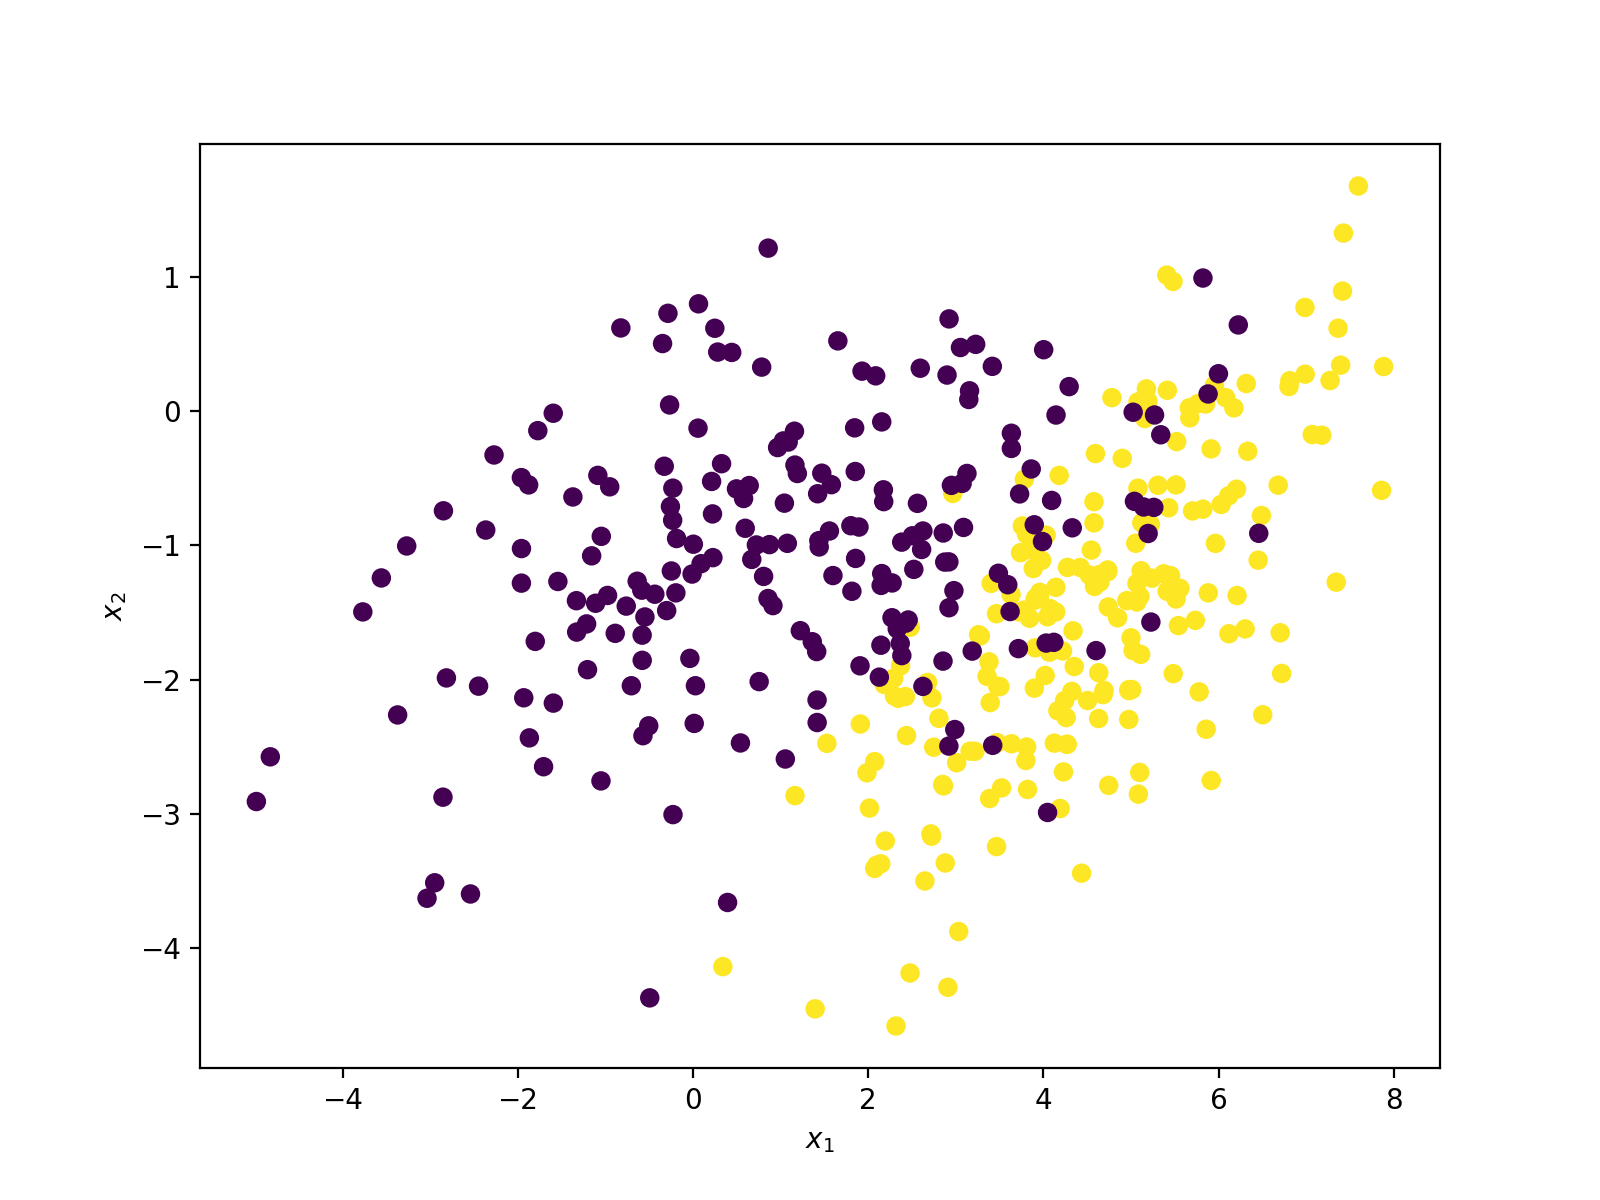

Text(0, 0.5, '$x_2$')

In [20]:

plt.figure(figsize=(8, 6))

plt.scatter(X[:,0], X[:,1], c=y[:, 0])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


Визуализируем также с помощью трехмерного графика как изменяются предсказания модели в зависимости от точки пространства.

<IPython.core.display.Javascript object>


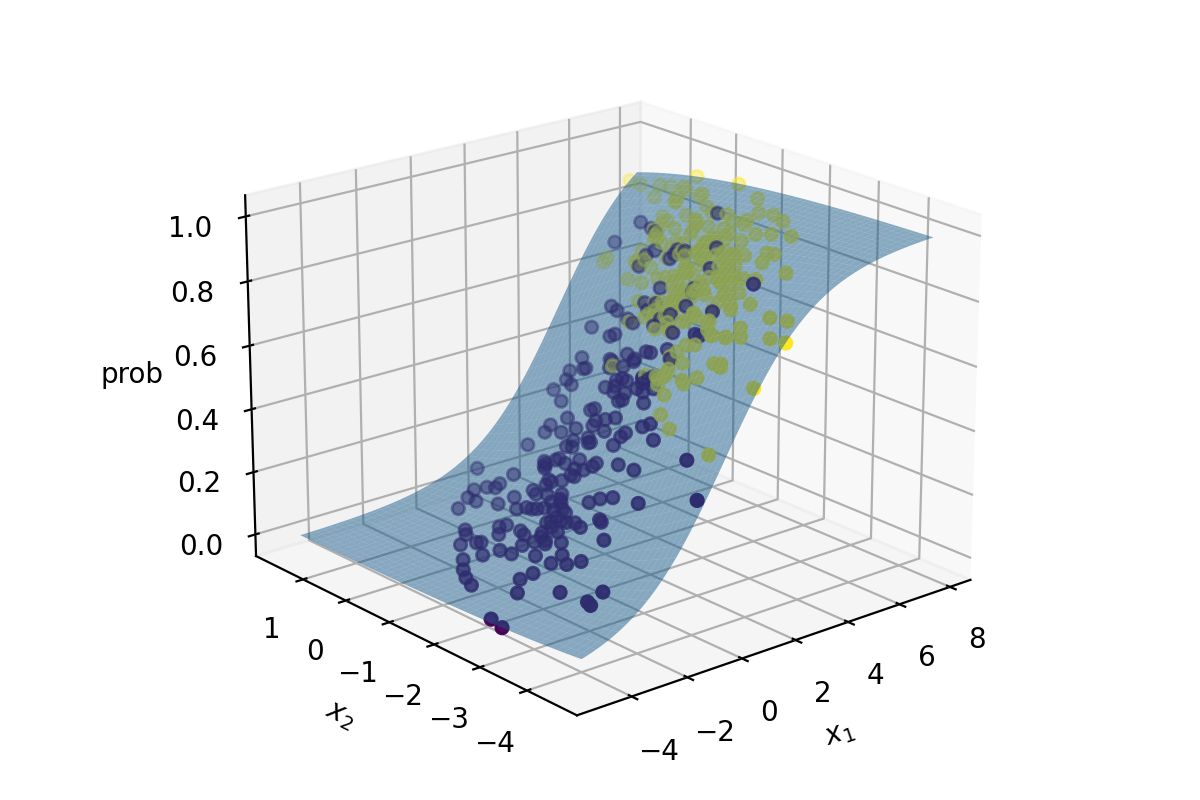

/Users/a19209489/anaconda3/envs/made/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if sys.path[0] == '':


Text(0.5, 0, 'prob')

In [19]:
xticks = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yticks = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

pred = model.sigmoid(model.w[0, 0]*X[:, 0] + model.w[1, 0]*X[:, 1] + model.b[0, 0])

xxx, yyy = np.meshgrid(xticks, yticks)
zzz = model.sigmoid(model.w[0, 0]*xxx + model.w[1, 0]*yyy + model.b[0, 0])
zticks = model.sigmoid(model.w[0, 0]*xxx + model.w[1, 0]*yyy + model.b[0, 0])


fig = plt.figure(figsize=(6, 4))
ax = Axes3D(fig, azim=-130, elev=20)

ax.scatter(X[:,0], X[:,1], pred, c=y[:, 0])
ax.plot_surface(xxx, yyy, zzz, alpha=0.5)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("prob")